<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 3 – Συνδυασμός Μοντέλων

όνομα: Ναταλία Ταμβακίδου ΑΕΜ:200

#Εισαγωγή Βιβλιοθηκών

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from itertools import product
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Εμφάνιση Δεδομένων

In [180]:
ticker_symbol="DX-Y.NYB"
ticker=yf.Ticker(ticker_symbol)
df=ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0


In [181]:
#αφαίρεση των στηλών Volume,Dividends,Stock Splits
df=df.drop(["Volume","Dividends","Stock Splits"],axis=1)
df

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003


#Ερώτημα 1


In [182]:
df["Date"]=pd.to_datetime(df["Date"])
fig=go.Figure()
columns_to_plot=["Open","High","Low","Close"]
for column in columns_to_plot:
  fig.add_trace(go.Scatter(x=df["Date"],y=df[column],mode="lines",name=column))
fig

In [183]:
means=()
for i in columns_to_plot:
  means=means+(df[i].mean(),)
print(means)
for i in means:
  fig.add_trace(go.Scatter(x=df["Date"],y=[i]*len(df),mode="lines",name="mean"))
fig

(np.float64(100.74088299492568), np.float64(101.0704375018937), np.float64(100.4255122121782), np.float64(100.75272871941542))


In [184]:
print(df.describe())

              Open         High          Low        Close
count  1257.000000  1257.000000  1257.000000  1257.000000
mean    100.740883   101.070438   100.425512   100.752729
std       5.685186     5.748059     5.610028     5.684790
min      89.320000    89.800003    89.209999    89.440002
25%      96.309998    96.599998    96.099998    96.389999
50%     102.290001   102.629997   101.940002   102.290001
75%     104.620003   105.010002   104.260002   104.669998
max     114.190002   114.779999   113.330002   114.110001


#Ερώτημα 2

Παρατηρώντας το γράφημα που κάναμε στο ερώτημα 1:

1. Οι τιμές κάθε χαρακτηριστικού δεν κινούνται γύρω απο την μέση τιμή τους,αλλά ανεβαίνουν και κατεβαίνουν σε μακροχρόνιες τάσεις.
2. Η κίνηση τών τιμών είναι αρκετά έντονη, υπάρχουν περίοδοι με ήπιες κινήσεις και άλλεσ με απότομες μεταβολές.
3. Οι τιμές μπορεί να αβεβαίνουν ή να κατεβαίνουν για μήνες.

Συνεπώς οι χρονοσειρές Open,High,Low,CLose είναι μη στατικές.

#Ερώτημα 3

Έστω ότι έχουμε μια μη στατική χρονοσειρά.Αυτό σημαίνει ότι οι τιμές της δεν παραμένουν κοντά στη μέση τιμή τους με την πάροδο του χρόνου, αλλα παρουσιάζου τάσεις.Έτσι αν εκπαιδεύσουμε έναν Regressor σε μη στατικές χρονοσειρές τότε τα outpts που θα προβλέπει,όταν του δώσουμε νέα δεδομένα,θα έχουν χαμηλή ακρίβεια.Αυτό συμβαίνει γιατί ο regressor έχει δημιουργήσει,με βάση το training set,μια συνεχή συνάρτηση πρόβλεψης εξαρτημένη απο τον χρόνο(της μορφής f(C_t)=C_t+1 για κάθε χαρακτηριστικό).Όμως,στην πραγματικότητα οι τιμές των χρονοσειρών δεν αλλάζουν με συνεχή τρόπο ως προς τον χρόνο,αλλά επιρεάζονται απο τάσεις,εποχικότητα και ξαφνικές μεταβολές.

Συνεπώς, το μοντέλο μαθαίνει ένα "λάθος" μοτίβο που ισχύει μόνο για το training set και δεν μπορεί να γενικεύση.

#Ερώτημα 4

In [185]:
fig.update_xaxes(range=["2025-06-01","2025-07-31"],title_text="Date")
fig.update_layout(title="Τιμές Open, High, Low, Close (Ιούνιος–Ιούλιος 2025)",yaxis_title="Τιμή",width=1200,height=700,template="plotly_white")
fig.show()

Χωρίζοντας το αρχικό διάγραμμα του Ερωτήματος 1 σε τρεις περιόδους,με βάση το αν οι τιμές των χρονοσειρών βρίσκονται πάνω ή κάτω απο την μέση τιμή τους, παρατηρούμε ότι το δίαστημα Ιούνιοσς-Ιούλιος του 2025, οι χρονοσιερές παρουσιάζουν μια κυρτή καμπύλη.Αυτό σημαίνει ότι οι τιμές του δολαρίου μειώνονται.

Η τάση αυτή συνδέεται με τις τότε προσδοκίες για μελλοντικές μειώσεις επιτοκίων από τη Federal Reserve, λόγω επιβράδυνσης του πληθωρισμού και ασθενέστερων οικονομικών δεικτών στις Η.Π.Α. Η αποδυνάμωση αυτή αντανακλά την αρνητική επενδυτική διάθεση και τη μετατόπιση κεφαλαίων προς άλλα νομίσματα. Ωστόσο, προς τα τέλη Ιουλίου παρατηρείται μερική ανάκαμψη, έπειτα από αναθεωρημένες δηλώσεις της Fed και ισχυρότερα μακροοικονομικά δεδομένα, που περιόρισαν τις προσδοκίες για άμεση χαλάρωση της νομισματικής πολιτικής.

#Ερώτημα 5

Είναι ιδιαίτερα δύσκολο να εκτιμήσουμε μεταβλητές που εξαρτούνται απο τον χρόνο,όπως είναι οι χροονοσειρές.Αυτό συμβαίνει επειδή οι τιμές τους μεταβάλονται ανά χρονικές περιόδους,επιρεάζονται απο εξωτερικούς παράγοντες(όπως είδαμε στο Ερώτημα 4) και αποτελούν στοχαστικές διαδικασίες,δηλαδή περιέχουν τιμές που δεν μπορούν να αποδοθούν απο μία συγκεκριμένη συνάρτηση.Επομένως, η πρόβλεψη της τιμής του επόμενου close,γνωρίζωντας τις σημερινές τιμές open,high,low,close ,μπορεί να γίνει μόνο προσεγγιστικά, με τη χρήση στατιστικών ή μηχανικών μοντέλων, τα οποία όμως δίνουν πιθανές εκτιμήσεις και όχι βέβαιες τιμές.

#Ερώτημα 6

Όπως αναφέραμε και στα προηγούμενα ερωτήματα, οι χρονοσειρές αποτελούν μεταβλητές που εξαρτώνται από τον χρόνο. Αυτό σημαίνει ότι, αν πραγματοποιηθεί τυχαίος διαχωρισμός του συνόλου δεδομένων προκειμένου να εκπαιδευτεί το μοντέλο, είναι πολύ πιθανό να εισαχθούν λανθασμένα δεδομένα που αντιστοιχούν σε μελλοντικές χρονικές στιγμές. Με τον τρόπο αυτό, το μοντέλο λαμβάνει πληροφορίες που, λόγω της χρονικής εξάρτησης της μεταβλητής, θα έπρεπε κανονικά να προβλέψει — φαινόμενο γνωστό ως data leakage.
Συνεπώς, δεν έχει νόημα να πραγματοποιηθεί τυχαίος διαχωρισμός στα δεδομένα μιας χρονοσειράς· ο διαχωρισμός πρέπει να γίνεται χρονολογικά, ώστε να διασφαλίζεται η εγκυρότητα της πρόβλεψης.

#Ερώτημα 7

In [186]:
#δημιουργία train και test dataframe
train_df=df[df["Date"]<"2024-01-01"]
test_df=df[df["Date"]>="2024-01-01"]
train_df=train_df.drop(["Date"],axis=1)
test_df=test_df.drop(["Date"],axis=1)


#Ερώτημα 8

In [187]:
#δημιουργία συνάρτησης
def create_timeframes_from_df(df_input,N):
  df_input=df_input.copy()
  df_input["Target"]=df_input["Close"].shift(-N)
  df_input=df_input[:-N]
  data=df_input[["Open","High","Low","Close"]].values
  X=np.array([data[i:i+N] for i in range(len(data)-N+1)])
  Y= df_input["Target"].values
  return X,Y

In [188]:
X_train,Y_train=create_timeframes_from_df(train_df,4)
print( X_train[0])
print(Y_train[0])
print(X_train[1])
print(Y_train[1])


[[93.33999634 93.55000305 92.48999786 92.52999878]
 [92.56999969 92.81999969 92.18000031 92.23000336]
 [92.23999786 92.95999908 92.12999725 92.73000336]
 [92.76000214 92.97000122 92.59999847 92.75      ]]
93.04000091552734
[[92.56999969 92.81999969 92.18000031 92.23000336]
 [92.23999786 92.95999908 92.12999725 92.73000336]
 [92.76000214 92.97000122 92.59999847 92.75      ]
 [92.69999695 93.20999908 92.61000061 93.04000092]]
92.95999908447266


#Ερώτημα 9

Το μέγεθος Ν της συνάρτησης που δημιοργήσαμε στο προηγούμενο ερώτημα προκειμένου να δημιουργούμε timeframe,καθορίζει πόσες προηγούμενς μέρες χρησιμοποιήμου για να προβλέψουμε την οπόμενη μέρα.

Περιπτώσεις:

1.**Πρόβλεψη επόμενης μέρας**

Για να προβλέψουμε την τιμή της επόμενης μέρας καλό είναι να χρησιμοποιήσουμε μια μικρή τιμή για το Ν.Κάνουμε την επιλογή αυτή γιατί η τιμή της επόμενης μέρας επηρεάζεται κυρίως απο τις τελευταίες κινήσης της αγοράς.Αν επιλλέγαμε μεγάλο Ν,τότε ένα γεγονός που μπορεί να είχε επηρέασει τις τιμές (αύξηση ή μείωση ) και πλέον έχει αποδυναμωθεί,να δίνει λανθασμένες πληροφορίες για την τιμή της επόμενης μέρας.

2.**Πρόβλεψη μακρύτερου ορίζοντα (π.χ 1 μήνα)**

Σε αυτή την περίπτωση η τιμή Ν θέλουμε να είναι μεγάλη.Επιλέγουμε Ν μεγάλο έτσι ώστε να δώσουμε αρκετή πληροφορία στο μοντέλο να εντοπίσει τάσεις,εποχικότητα και κύκλουσ.


#Ερώτημα 10

In [189]:
def create_timeframes_from_df(df_input,N):
  df_input=df_input.copy()
  df_input["Target"]=df_input["Close"].shift(-N)
  df_input=df_input[:-N]
  data=df_input[["Open","High","Low","Close"]].values
  X=np.array([data[i:i+N] for i in range(len(data)-N+1)])
  Y= df_input["Target"].values[:len(X)] # Ensure Y has the same number of samples as X
  return X,Y
X_train,Y_train=create_timeframes_from_df(train_df,5)
X_test,Y_test=create_timeframes_from_df(test_df,5)
X_train=X_train.reshape(X_train.shape[0],5*4)
X_test=X_test.reshape(X_test.shape[0],5*4)
print(X_train[0])

[93.33999634 93.55000305 92.48999786 92.52999878 92.56999969 92.81999969
 92.18000031 92.23000336 92.23999786 92.95999908 92.12999725 92.73000336
 92.76000214 92.97000122 92.59999847 92.75       92.69999695 93.20999908
 92.61000061 93.04000092]


#Ερώτημα 11

In [190]:
# a. Linear regression
model_a=LinearRegression()
model_a.fit(X_train,Y_train)
Y_pred_a=model_a.predict(X_test)
Y_pred_train_a=model_a.predict(X_train)
mae_train_a=mean_absolute_error(Y_train,Y_pred_train_a)
mae_test_a  = mean_absolute_error(Y_test,Y_pred_a)


In [191]:
# b.Random Forest Regressor
model_b=RandomForestRegressor(random_state=0)
model_b.fit(X_train,Y_train)
Y_pred_b=model_b.predict(X_test)
Y_pred_train_b=model_b.predict(X_train)
mae_train_b=mean_absolute_error(Y_train,Y_pred_train_b)
mae_test_b  = mean_absolute_error(Y_test, Y_pred_b)

In [192]:
# c.Bagging Regressor με Linear Regression
base_estimator=LinearRegression()
model_c=BaggingRegressor(estimator=base_estimator,n_estimators=10,random_state=0)
model_c.fit(X_train,Y_train)
Y_pred_c=model_c.predict(X_test)
Y_pred_train_c=model_a.predict(X_train)
mae_train_c=mean_absolute_error(Y_train,Y_pred_train_c)
mae_test_c  = mean_absolute_error(Y_test, Y_pred_c)

In [193]:
#d XGBoost Regressor
model_d=xgb.XGBRegressor(random_state=0)
model_d.fit(X_train,Y_train)
Y_pred_d=model_d.predict(X_test)
Y_pred_train_d=model_d.predict(X_train)
mae_train_d=mean_absolute_error(Y_train,Y_pred_train_d)
mae_test_d=mean_absolute_error(Y_test,Y_pred_d)

In [194]:
!pip install xgboost

In [195]:
#d XGBoost Regressor
model_d=xgb.XGBRegressor(random_state=0)
model_d.fit(X_train,Y_train)
Y_pred_d=model_d.predict(X_test)
Y_pred_train_d=model_d.predict(X_train)
mae_train_d=mean_absolute_error(Y_train,Y_pred_train_d)
mae_test_d=mean_absolute_error(Y_test,Y_pred_d)

In [196]:
#e.Stacking Regressor (Linear + Decision Tree)
estimators=[("lr",LinearRegression()),("dt",DecisionTreeRegressor(random_state=0))]
model_e=StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
model_e=model_e.fit(X_train,Y_train)
Y_pred_e=model_e.predict(X_test)
Y_pred_train_e=model_e.predict(X_train)
mae_train_e=mean_absolute_error(Y_train,Y_pred_train_e)

mae_test_e=mean_absolute_error(Y_test,Y_pred_e)

Σχολιασμός για το πως δουλεύει κάθε μοντέλο:

a.Liner Regressior:Δημιουργεί μια γραμμική σχέση (πολυώνυμο) μεταξύ των χαρακτηριστικών και τιμής-στόχου,ελαχιστοποιώντας το τετραγωνικό σφάλμα.

b.Random Forest Regressor:συνδυάζει πολλά δέντρα απόφασης και παίρνει τον μέσο όρο των προβλέψεων τους.

c.Baggin Regressor:Εκπαιδεύει πολλάμ μοντέλλα(στην δική μας περίπτωση Linear Regressor) σε διαφορετικά τυχαία δείγματα και συνδυάζει τις προλέψεις του.

d.XGBoost:δημιουργεί διαδοχικά δέντρα που το ένα είναι καλύτερο από το άλλο,βελτιώνοντας σταδιακά την ακρίβεια.

e.Stacking Regressor:Συνδυάζει διαφορετικους τύπους μοντέλων και χρησιμοποιεί ενα τελικό μοντέλο για τξ βέλτιστη συνένωση των προβλέψεων τους.

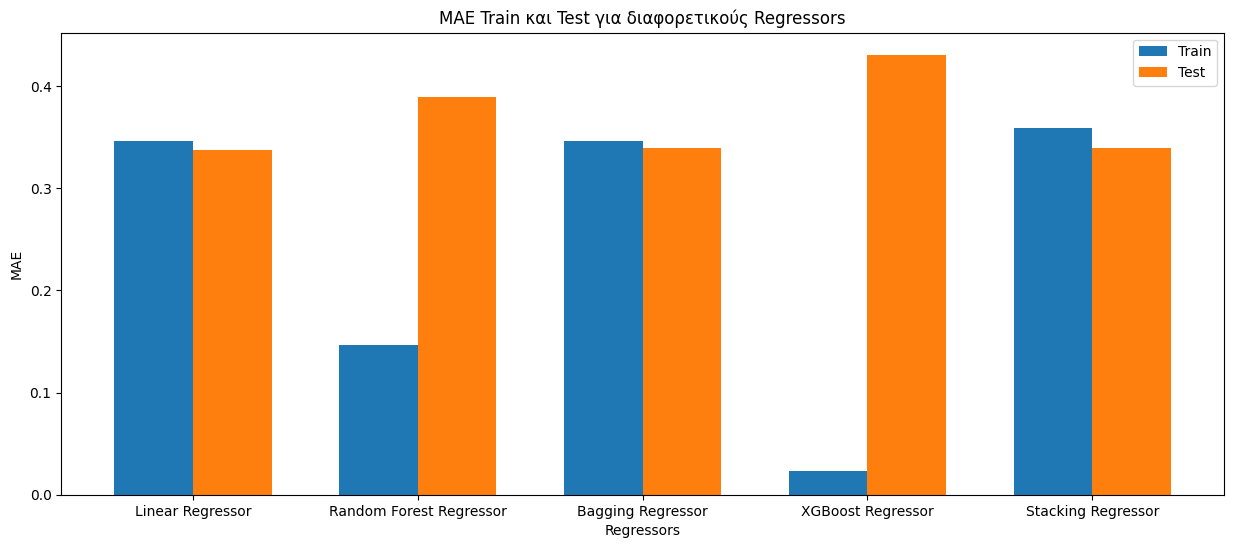

In [197]:
#δημιουργία barplot
models=["Linear Regressor","Random Forest Regressor","Bagging Regressor","XGBoost Regressor","Stacking Regressor"]
mae_train_values=[mae_train_a,mae_train_b,mae_train_c,mae_train_d,mae_train_e]
mae_test_values=[mae_test_a,mae_test_b,mae_test_c,mae_test_d,mae_test_e]
x=np.arange(len(models))
width=0.35
fig,ax=plt.subplots(figsize=(15,6))
rects1=ax.bar(x-width/2,mae_train_values,width,label="Train")
rects2=ax.bar(x+width/2,mae_test_values,width,label="Test")
ax.set_ylabel('MAE')
ax.set_xlabel('Regressors')
ax.set_title('MAE Train και Test για διαφορετικούς Regressors')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

Σχόλιο:Παρατηρώντας το Barplot συμπεραίουμε ότι:

1. Οι καλύτεροι estimators είναι Linear Regressor,Bagging Regressor και Stacking.Είναι οι μόνοι που καταφέρνουν να μειώσουν λιγό το σφάλμα.

2. Αντίθετα, στην περίπτωση του Random Forest Regressor και του XGboost Regressor λόγω της μεγάλης απόκλισης που έχουν οι τιμές των σφαλμάτων,έχουμε overfiting.

#Ερώτημα 12a

In [198]:
 df["Day"]=df["Date"].dt.day
 df["Month"]=df["Date"].dt.month
 def get_season(month):
  if month in [12,1,2]:
    return "Winter"
  elif month in [3,4,5]:
    return "Spring"
  elif month in [6,7,8]:
    return "Summer"
  else:
    return "Autum"


In [199]:
df["Season"]=df["Month"].apply(get_season)
df

,Date,Open,High,Low,Close,Day,Month,Season
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,5,11,Autum
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,6,11,Autum
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,9,11,Autum
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,10,11,Autum
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,11,11,Autum
...,...,...,...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,29,10,Autum
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,30,10,Autum
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,31,10,Autum
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,3,11,Autum


Σχόλιο :Η προσθήκη των χαρακτηριστικών Day, Month και Season ενισχύει το μοντέλο με χρονική πληροφορία που δεν υπήρχε στα αρχικά δεδομένα.

Ο μήνας μπορεί να συμβάλει σημαντικά στη βελτίωση των προβλέψεων, διότι οι τιμές των χρηματοοικονομικών δεικτών συχνά παρουσιάζουν επαναλαμβανόμενα εποχικά μοτίβα.

Για παράδειγμα:
Τους καλοκαιρινούς μήνες παρατηρείται συνήθως μειωμένος όγκος συναλλαγών και μικρότερη μεταβλητότητα.

Αντίθετα, προς το τέλος του έτους ή στις αρχές κάθε τριμήνου, οι αγορές συχνά παρουσιάζουν αυξημένη δραστηριότητα λόγω αναθεωρήσεων και επενδυτικών αποφάσεων.

Συνεπώς, το μοντέλο αποκτά τη δυνατότητα να ανιχνεύει εποχικότητα και χρονικές τάσεις, γεγονός που οδηγεί σε αυξημένη ακρίβεια προβλέψεων και καλύτερη γενίκευση σε δεδομένα με χρονική εξάρτηση.

#ερώτημα 12b

In [200]:
for col in ["Open","High","Low","Close"]:
  df[f"{col}_log_return"]=np.log(df[col]/df[col].shift(1))
  df=df.dropna().reset_index(drop=True)
  df.head()


In [201]:
df

,Date,Open,High,Low,Close,Day,Month,Season,Open_log_return,High_log_return,Low_log_return,Close_log_return
0,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,11,11,Autum,-0.000647,0.002578,0.000108,0.003122
1,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999,12,11,Autum,0.003339,-0.000751,0.001834,-0.000860
2,2020-11-13 00:00:00-05:00,92.949997,93.010002,92.709999,92.760002,13,11,Autum,-0.000645,-0.001397,-0.000755,-0.002154
3,2020-11-16 00:00:00-05:00,92.720001,92.839996,92.459999,92.570000,16,11,Autum,-0.002477,-0.001829,-0.002700,-0.002050
4,2020-11-17 00:00:00-05:00,92.489998,92.610001,92.269997,92.419998,17,11,Autum,-0.002484,-0.002480,-0.002057,-0.001622
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,29,10,Autum,-0.000101,0.004135,0.000507,0.005356
1249,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,30,10,Autum,0.004043,0.003617,0.003037,0.003119
1250,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,31,10,Autum,0.003524,0.001203,0.005042,0.002709
1251,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,3,11,Autum,0.002610,0.001501,0.002913,0.000701


#Ερώτημα 12c

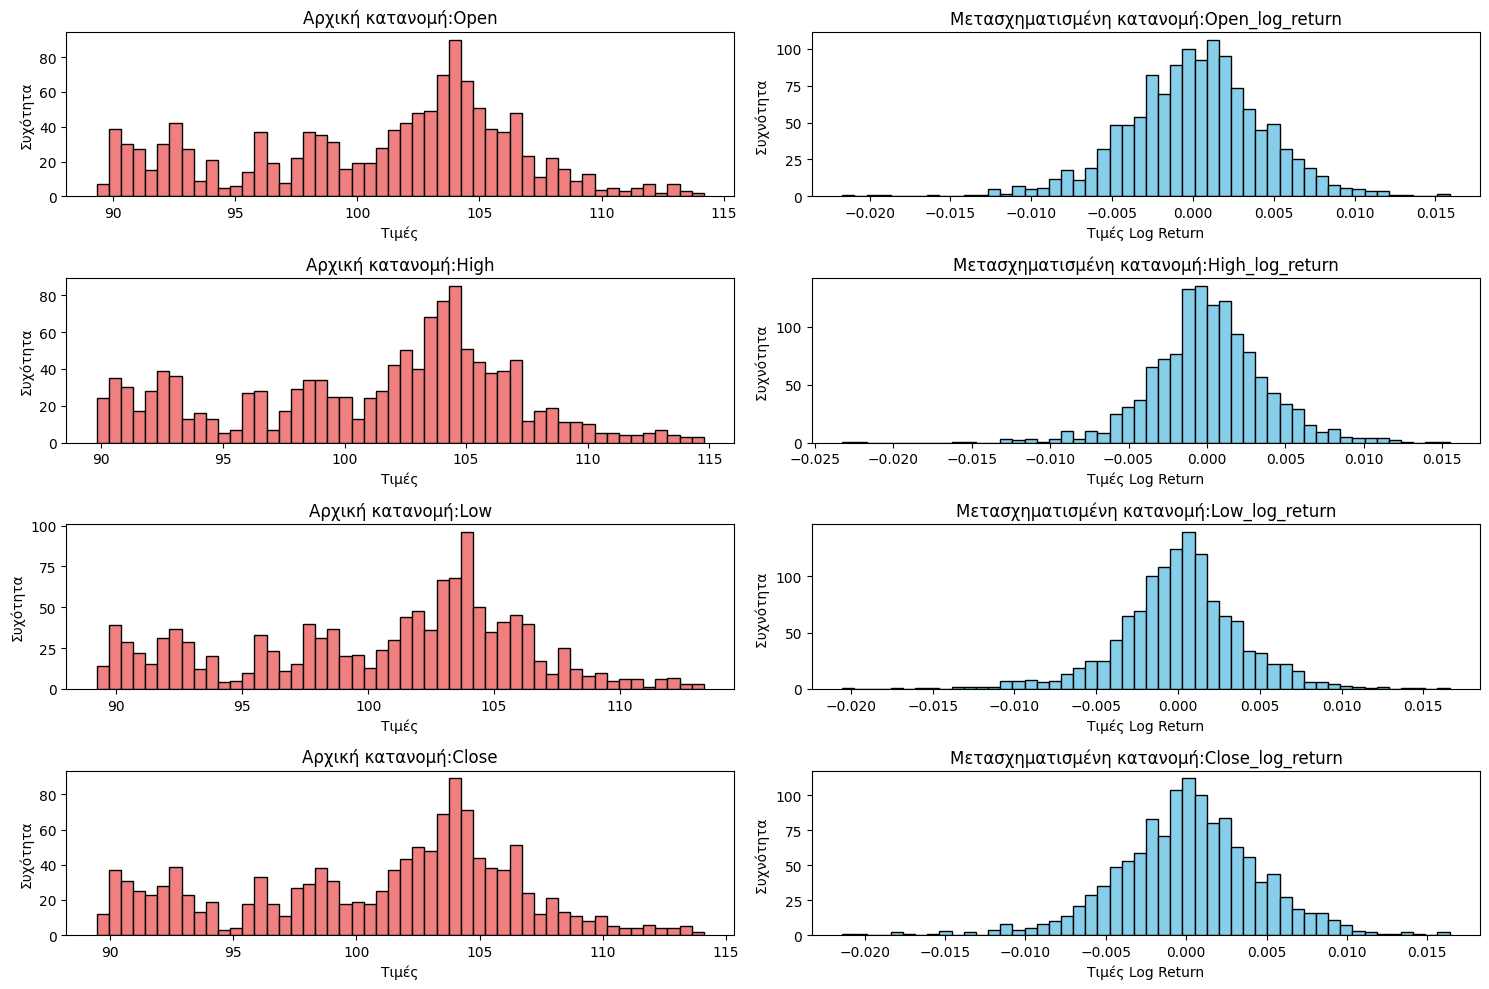

In [202]:
cols=["Open","High","Low","Close"]
cols_log=["Open_log_return","High_log_return","Low_log_return","Close_log_return"]
plt.figure(figsize=(15,10))
for i,(col,col_log) in enumerate(zip(cols,cols_log),1):
  plt.subplot(4,2,2*i-1)
  plt.hist(df[col],bins=50,color="lightcoral",edgecolor="black")
  plt.title(f"Αρχική κατανομή:{col}")
  plt.xlabel("Τιμές")
  plt.ylabel("Συχότητα")

  plt.subplot(4,2,2*i)
  plt.hist(df[col_log],bins=50,color="skyblue",edgecolor="black")
  plt.title(f"Μετασχηματισμένη κατανομή:{col_log}")
  plt.xlabel("Τιμές Log Return")
  plt.ylabel("Συχνότητα ")
plt.tight_layout()
plt.show()

Σχόλιο:

Παρατηρώντας τα ιστογράμματα,βλέπουμε ότι οι αρχικές τιμές των μεταβλητών (Open,High,Low,Close)έχουν μεγάλη διασπορά.

Μετά την εφαρμογή του μετασχηματισμού Log Return,οι νέες στήλες συγκεντρώνονται γύρω απο το μηδέν και προσεγγίζουν κανονική κατανομή.

Συνεπώς, ο μετασχηματισμός καθιστά τα δεδομένα πιο στατικά,ομοιόμοργα και κανονονικοποιημένα,κάτι που θα οδηγήσει το μοντέλο να κανιε πιο αξιόπιστες προβλέψεις.



#Ερώτημα 12e

Αν κάποιο μοντέλο προβλέψει C_(t+1)=0,01 αυτό σημαίνει ότι η αναμενόμενη αλλαγή σε λογαριθμική κλίμακα είναι 0.01.Επομένως με βάση τον τύπου του μετασχηματισμού Log Return η απόλυτη τιμη του Close είναι:

C_(t+1)=C_t*e^(r_(t+1))
όπου r_(t+1)=η πρόβλεψη του μοντέλου=0.01

Δηλαδή θα έχουμε μια αύξηση περίπου 1% της τιμής Close
Αν επιπλέον C_t=0,95
τότε η απολυτή τιμή θα είναι C_(t+1)=0,96	​


#Ερώτημα 12d

In [203]:
df_log=df.drop(["Open","High","Low","Close"],axis=1)
df_log

,Date,Day,Month,Season,Open_log_return,High_log_return,Low_log_return,Close_log_return
0,2020-11-11 00:00:00-05:00,11,11,Autum,-0.000647,0.002578,0.000108,0.003122
1,2020-11-12 00:00:00-05:00,12,11,Autum,0.003339,-0.000751,0.001834,-0.000860
2,2020-11-13 00:00:00-05:00,13,11,Autum,-0.000645,-0.001397,-0.000755,-0.002154
3,2020-11-16 00:00:00-05:00,16,11,Autum,-0.002477,-0.001829,-0.002700,-0.002050
4,2020-11-17 00:00:00-05:00,17,11,Autum,-0.002484,-0.002480,-0.002057,-0.001622
...,...,...,...,...,...,...,...,...
1248,2025-10-29 00:00:00-04:00,29,10,Autum,-0.000101,0.004135,0.000507,0.005356
1249,2025-10-30 00:00:00-04:00,30,10,Autum,0.004043,0.003617,0.003037,0.003119
1250,2025-10-31 00:00:00-04:00,31,10,Autum,0.003524,0.001203,0.005042,0.002709
1251,2025-11-03 00:00:00-05:00,3,11,Autum,0.002610,0.001501,0.002913,0.000701


In [204]:
#δημιουργία train και test dataframe
train_df_log=df_log[df_log["Date"]<"2024-01-01"]
test_df_log=df_log[df_log["Date"]>="2024-01-01"]
train_df_log=train_df_log.drop(["Date"],axis=1)
test_df_log=test_df_log.drop(["Date"],axis=1)


In [205]:
def create_timeframes_from_df(df_input,N):
  df_input=df_input.copy()
  df_input["Target"]=df_input["Close_log_return"].shift(-N)
  df_input=df_input[:-N]
  data=df_input[["Open_log_return","High_log_return","Low_log_return","Close_log_return"]].values
  X=np.array([data[i:i+N] for i in range(len(data)-N+1)])
  Y= df_input["Target"].values[:len(X)] # Ensure Y has the same number of samples as X
  return X,Y
X_train,Y_train=create_timeframes_from_df(train_df_log,5)
X_test,Y_test=create_timeframes_from_df(test_df_log,5)
X_train=X_train.reshape(X_train.shape[0],5*4)
X_test=X_test.reshape(X_test.shape[0],5*4)
print(X_train[0])

[-0.0006471   0.00257813  0.00010801  0.00312182  0.0033386  -0.00075127
  0.00183395 -0.00086023 -0.00064536 -0.00139669 -0.00075475 -0.00215375
 -0.00247747 -0.0018295  -0.00270022 -0.00205042 -0.0024837  -0.00248041
 -0.00205708 -0.00162173]


In [206]:
X_train,Y_train=create_timeframes_from_df(train_df_log,4)
print( X_train[0])
print(Y_train[0])
print(X_train[1])
print(Y_train[1])


[[-0.0006471   0.00257813  0.00010801  0.00312182]
 [ 0.0033386  -0.00075127  0.00183395 -0.00086023]
 [-0.00064536 -0.00139669 -0.00075475 -0.00215375]
 [-0.00247747 -0.0018295  -0.00270022 -0.00205042]]
-0.0016217261526176997
[[ 0.0033386  -0.00075127  0.00183395 -0.00086023]
 [-0.00064536 -0.00139669 -0.00075475 -0.00215375]
 [-0.00247747 -0.0018295  -0.00270022 -0.00205042]
 [-0.0024837  -0.00248041 -0.00205708 -0.00162173]]
-0.0010825861756400778


In [207]:
# a. Linear regression
def create_timeframes_from_df(df_input,N):
  df_input=df_input.copy()
  df_input["Target"]=df_input["Close_log_return"].shift(-N)
  df_input=df_input[:-N]
  data=df_input[["Open_log_return","High_log_return","Low_log_return","Close_log_return"]].values
  X=np.array([data[i:i+N] for i in range(len(data)-N+1)])
  Y= df_input["Target"].values[:len(X)] # Ensure Y has the same number of samples as X
  return X,Y
X_train,Y_train=create_timeframes_from_df(train_df_log,5)
X_test,Y_test=create_timeframes_from_df(test_df_log,5)

model_a=LinearRegression()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
model_a.fit(X_train,Y_train)
Y_pred_a=model_a.predict(X_test)
Y_pred_train_a=model_a.predict(X_train)
mae_train_a=mean_absolute_error(Y_train,Y_pred_train_a)
mae_test_a  = mean_absolute_error(Y_test,Y_pred_a)

In [208]:
# b.Random Forest Regressor
model_b=RandomForestRegressor(random_state=0)
model_b.fit(X_train,Y_train)
Y_pred_b=model_b.predict(X_test)
Y_pred_train_b=model_b.predict(X_train)
mae_train_b=mean_absolute_error(Y_train,Y_pred_train_b)
mae_test_b  = mean_absolute_error(Y_test, Y_pred_b)

In [209]:
# c.Bagging Regressor με Linear Regression
base_estimator=LinearRegression()
model_c=BaggingRegressor(estimator=base_estimator,n_estimators=10,random_state=0)
model_c.fit(X_train,Y_train)
Y_pred_c=model_c.predict(X_test)
Y_pred_train_c=model_a.predict(X_train)
mae_train_c=mean_absolute_error(Y_train,Y_pred_train_c)
mae_test_c  = mean_absolute_error(Y_test, Y_pred_c)

In [210]:
#d XGBoost Regressor
model_d=xgb.XGBRegressor(random_state=0)
model_d.fit(X_train,Y_train)
Y_pred_d=model_d.predict(X_test)
Y_pred_train_d=model_d.predict(X_train)
mae_train_d=mean_absolute_error(Y_train,Y_pred_train_d)
mae_test_d=mean_absolute_error(Y_test,Y_pred_d)

In [211]:
#d XGBoost Regressor
model_d=xgb.XGBRegressor(random_state=0)
model_d.fit(X_train,Y_train)
Y_pred_d=model_d.predict(X_test)
Y_pred_train_d=model_d.predict(X_train)
mae_train_d=mean_absolute_error(Y_train,Y_pred_train_d)
mae_test_d=mean_absolute_error(Y_test,Y_pred_d)

In [212]:
#e.Stacking Regressor (Linear + Decision Tree)
estimators=[("lr",LinearRegression()),("dt",DecisionTreeRegressor(random_state=0))]
model_e=StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
model_e=model_e.fit(X_train,Y_train)
Y_pred_e=model_e.predict(X_test)
Y_pred_train_e=model_e.predict(X_train)
mae_train_e=mean_absolute_error(Y_train,Y_pred_train_e)

mae_test_e=mean_absolute_error(Y_test,Y_pred_e)

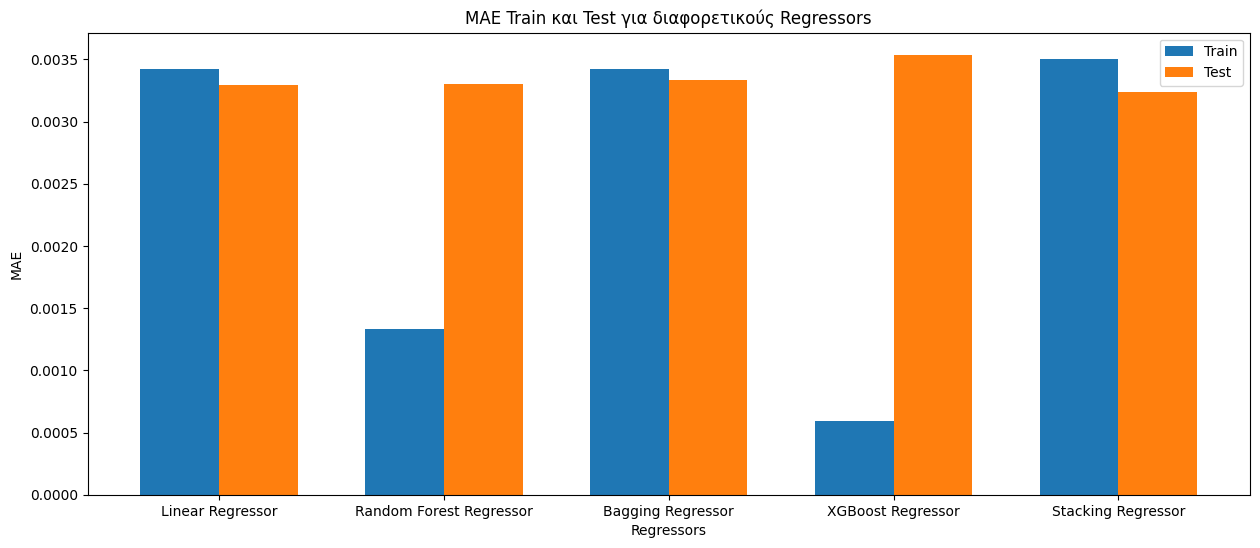

In [213]:
#για να κρινουμε ποιο ειναι καλυτερο μοντελο κανουμε και το ερωτημα 12 ξαβνα
#δημιουργία barplot
models=["Linear Regressor","Random Forest Regressor","Bagging Regressor","XGBoost Regressor","Stacking Regressor"]
mae_train_values=[mae_train_a,mae_train_b,mae_train_c,mae_train_d,mae_train_e]
mae_test_values=[mae_test_a,mae_test_b,mae_test_c,mae_test_d,mae_test_e]
x=np.arange(len(models))
width=0.35
fig,ax=plt.subplots(figsize=(15,6))
rects1=ax.bar(x-width/2,mae_train_values,width,label="Train")
rects2=ax.bar(x+width/2,mae_test_values,width,label="Test")
ax.set_ylabel('MAE')
ax.set_xlabel('Regressors')
ax.set_title('MAE Train και Test για διαφορετικούς Regressors')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

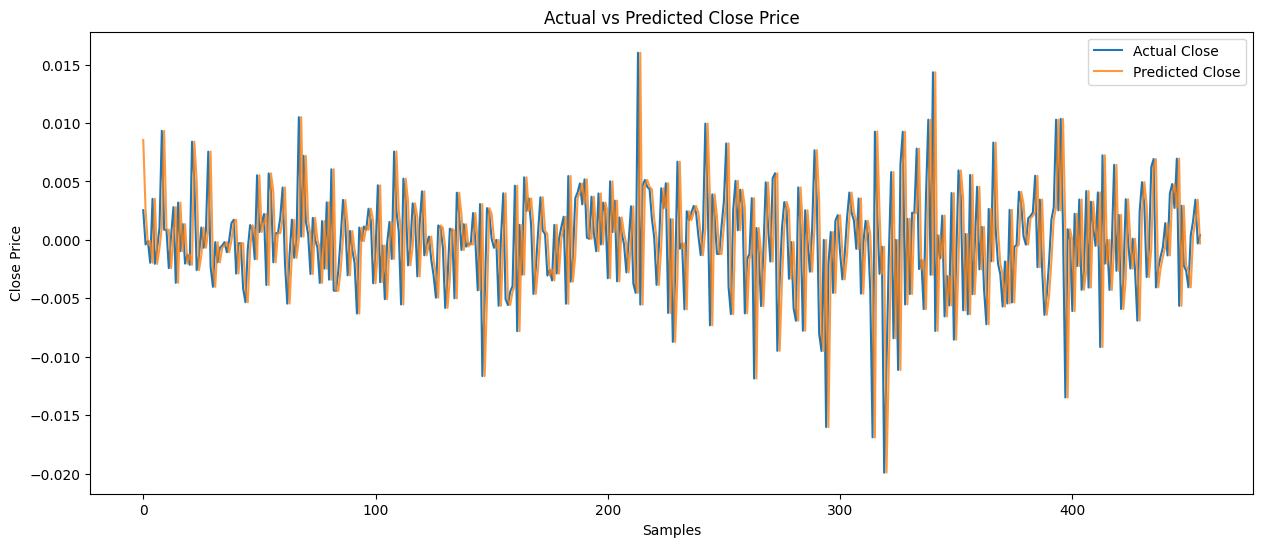

In [214]:
Y_pred_log = model_e.predict(X_test)
C_t = test_df_log["Close_log_return"].values[:len(Y_pred_log)]
C_pred = C_t * np.exp(Y_pred_log)
C_actual = test_df_log["Close_log_return"].values[1:len(Y_pred_log)+1]
plt.figure(figsize=(15,6))
plt.plot(C_actual, label="Actual Close")
plt.plot(C_pred, label="Predicted Close", alpha=0.8)
plt.xlabel("Samples")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()
plt.show()